This task implemented to apply the supervised learning technique especially (Classification)

In [1]:
import pandas as pd   # for data preprocessing
import numpy as np  # for mathematical operations
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns  # for visualization and Statistical analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,recall_score ,f1_score
from sklearn.metrics import classification_report
plt.style.use("fivethirtyeight") 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("diabetes.csv")

Explore Data

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.duplicated().sum()

0

Analysis

In [7]:
data.corr()  #finding the correlation between features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

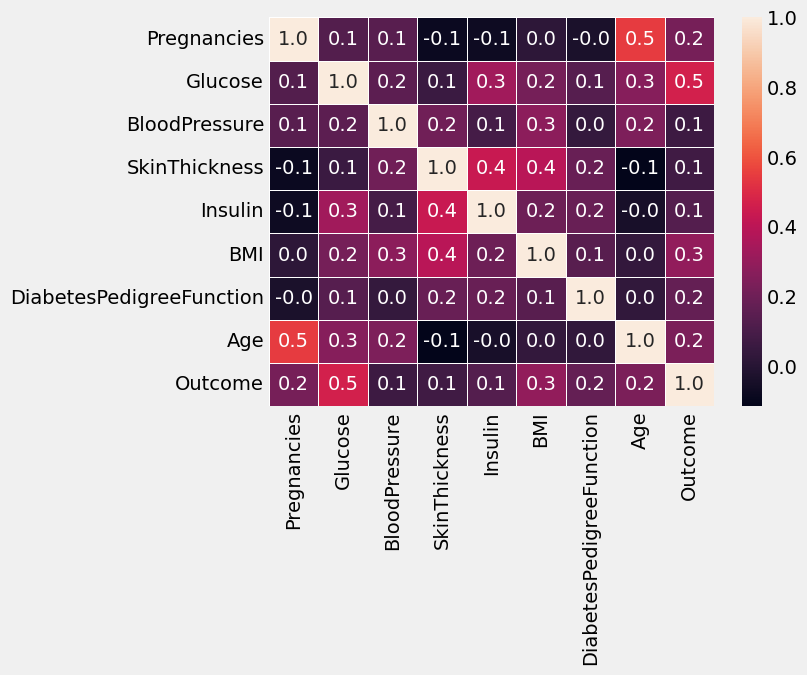

In [8]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f',linewidth=0.5)

<AxesSubplot: xlabel='Outcome', ylabel='count'>

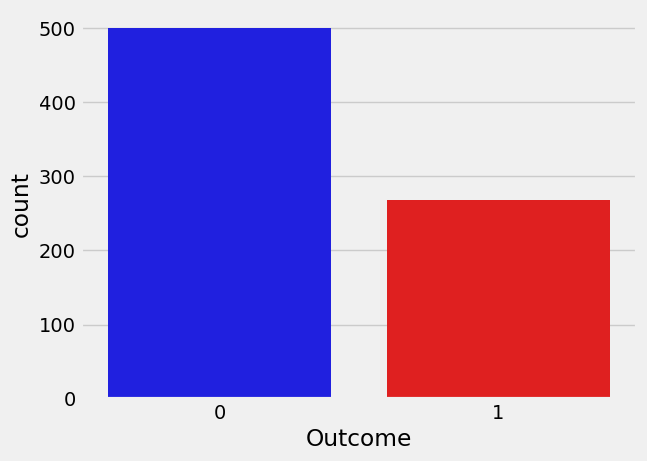

In [9]:
sns.countplot(x='Outcome',data=data ,palette=['b','r'])

In [10]:
max=data[data['Outcome']==0]
mini=data[data['Outcome']==1]
max.shape ,mini.shape

((500, 9), (268, 9))

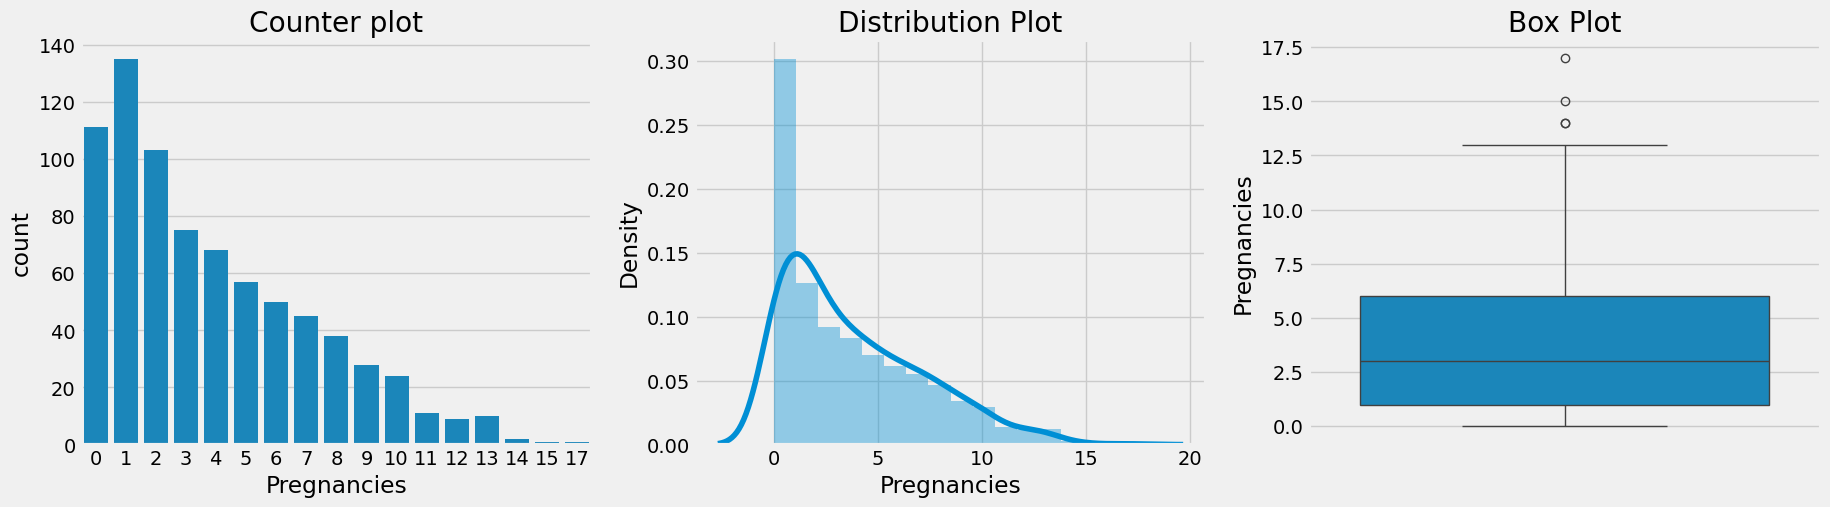

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Counter plot')
sns.countplot(x='Pregnancies',data=data)
plt.subplot(1,3,2)
plt.title("Distribution Plot")
sns.distplot(data['Pregnancies'])
plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data["Pregnancies"])
plt.show()

<AxesSubplot: ylabel='Age'>

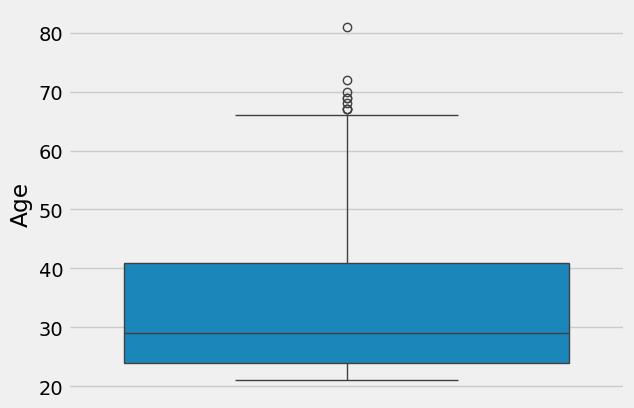

In [12]:
sns.boxplot(data.Age)

Create Model

distributing the data into features and output

In [13]:
#features,input
x=data.drop('Outcome',axis=1)
#target ,Label ,Output
y=data['Outcome']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [15]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier(n_estimators=100,class_weight='balanced')
model4=GradientBoostingClassifier(n_estimators=1000)

In [16]:
columns=['LogisticRegression','SCV','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

In [17]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    confusion_matrix(pre,y_test)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print("accuracy is",accuracy)
    print("Recall_score is",recall)
    print("F1_score is",f1)
    

LogisticRegression()
accuracy is 0.7922077922077922
Recall_score is 0.6956521739130435
F1_score is 0.6666666666666666


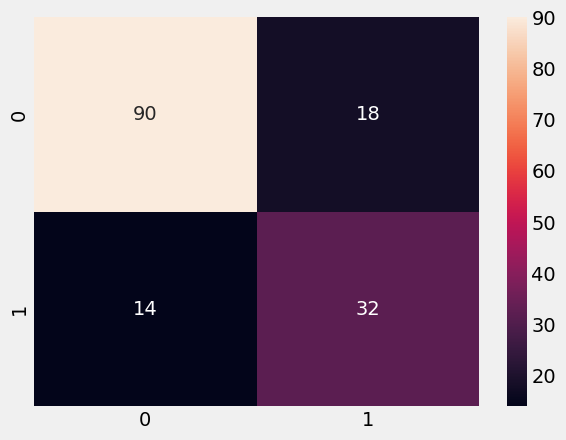

In [18]:
cal(model1)

SVC()
accuracy is 0.7597402597402597
Recall_score is 0.6756756756756757
F1_score is 0.5747126436781609


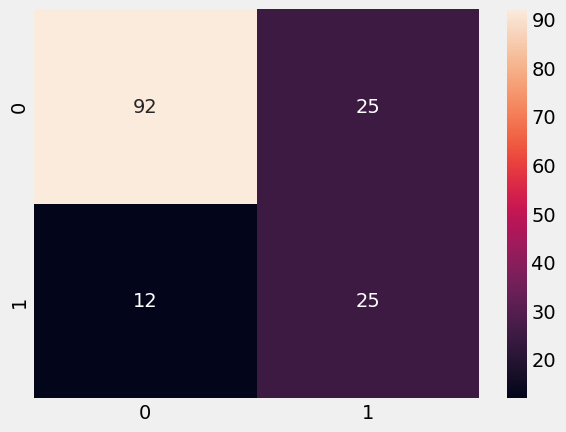

In [19]:
cal(model2)

RandomForestClassifier(class_weight='balanced')
accuracy is 0.7727272727272727
Recall_score is 0.6595744680851063
F1_score is 0.6391752577319587


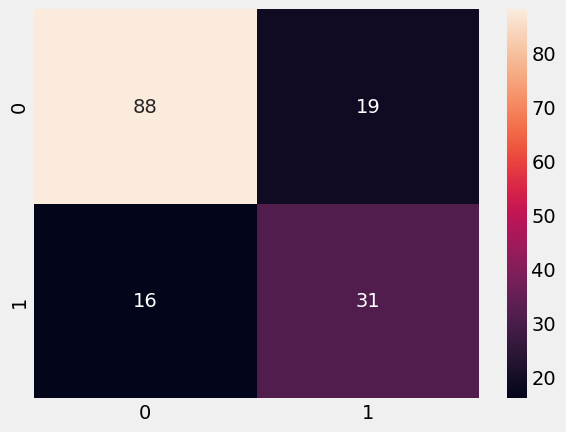

In [20]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is 0.7532467532467533
Recall_score is 0.6071428571428571
F1_score is 0.6415094339622641


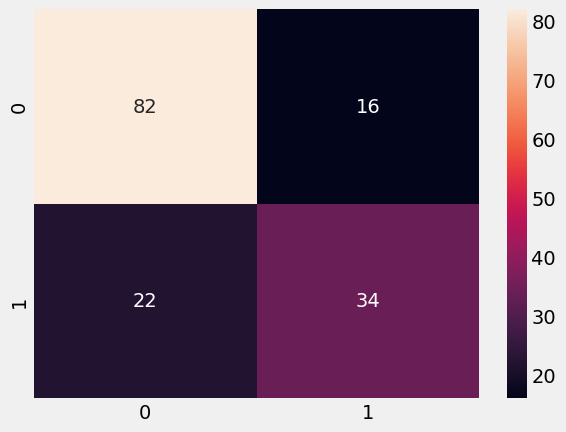

In [21]:
cal(model4)

In [22]:
result1

[0.7922077922077922,
 0.7597402597402597,
 0.7727272727272727,
 0.7532467532467533]

In [23]:
result2

[0.6956521739130435,
 0.6756756756756757,
 0.6595744680851063,
 0.6071428571428571]

In [24]:
result3

[0.6666666666666666,
 0.5747126436781609,
 0.6391752577319587,
 0.6415094339622641]

In [25]:
FinalResult=pd.DataFrame({"Algorithms":columns,"Accuracies":result1 ,"Recall":result2 ,"FScore":result3})

In [26]:
print(FinalResult)

                   Algorithms  Accuracies    Recall    FScore
0          LogisticRegression    0.792208  0.695652  0.666667
1                         SCV    0.759740  0.675676  0.574713
2      RandomForestClassifier    0.772727  0.659574  0.639175
3  GradientBoostingClassifier    0.753247  0.607143  0.641509


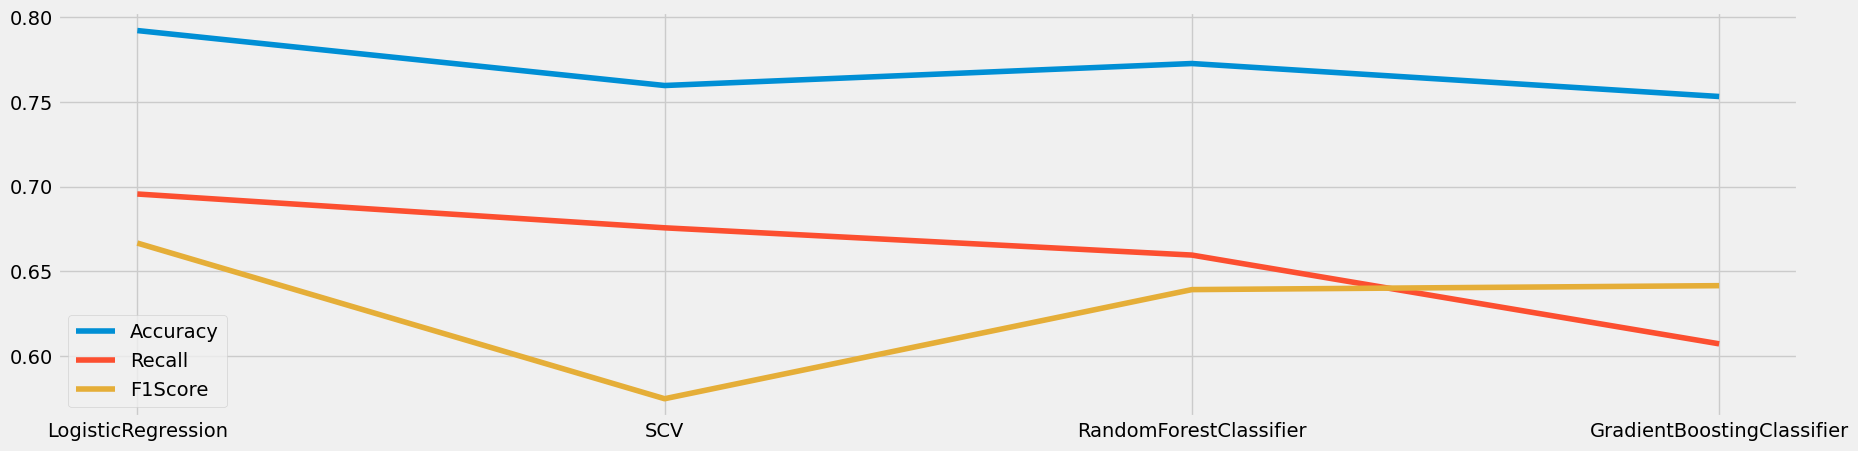

In [27]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithms,result1,label="Accuracy")
plt.plot(FinalResult.Algorithms,result2,label="Recall")
plt.plot(FinalResult.Algorithms,result3,label="F1Score")
plt.legend()
plt.show()